In [1]:
import fastf1
import pandas as pd

# plottings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# global vars
race_name = 'Saudia Arabia'
safety_car_laps = range(16, 22)

In [3]:
# colour palettes per driver
driver_pal = {
    'VER': '#0600EF',
    'PER': '#0600EF',
    
    'ALO': '#006F62', 
    'STR': '#006F62', 
    
    'LEC': '#DC0000',
    'SAI': '#DC0000',
    
    'HAM': '#00D2BE',
    'RUS': '#00D2BE',
    
    'BOT': '#900000', 
    'ZHO': '#900000', 
    
    'GAS': '#0090FF', 
    'OCO': '#0090FF', 
    
    'ALB': '#005AFF', 
    'SAR': '#005AFF', 
    
    'TSU': '#2B4562', 
    'DEV': '#2B4562', 
    
    'HUL': '#FFFFFF',
    'MAG': '#FFFFFF',
    
    'NOR': '#FF8700',
    'PIA': '#FF8700'
}

# colour palettes per team
team_pal = {
    'Red Bull Racing': '#0600EF',
    'Aston Martin': '#006F62', 
    'Ferrari': '#DC0000',
    'Mercedes': '#00D2BE',
    'Alfa Romeo': '#900000', 
    'Alpine': '#0090FF', 
    'Williams': '#005AFF', 
    'AlphaTauri': '#2B4562', 
    'Haas F1 Team': '#FFFFFF',
    'McLaren': '#FF8700'
}

In [4]:
race = fastf1.get_session(2023, 'Saudia Arabia Grand Prix', 'R')
race.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetch

# Average laptime per driver as boxplot

In [5]:
df_race = pd.DataFrame(race.laps)

# drop nas from laptime column
df_race.dropna(subset = "LapTime", inplace=True)

# drivernumber column is a string; convert to integers
df_race = df_race.astype({"DriverNumber": int})

# Convert the timedelta column to seconds
df_race['Lapseconds'] = df_race['LapTime'].dt.total_seconds()

# correct for fuelling laps
cols = ['PitOutTime', 'PitInTime']
df_race = df_race[df_race[cols].isna().all(1)]

# only retain IsAccurate = True laps
df_race = df_race[df_race['IsAccurate'] == True]

# remove safety car laps
df_race = df_race[~df_race.LapNumber.isin(safety_car_laps)]

df_race.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,Lapseconds
1,0 days 01:06:04.092000,11,0 days 00:01:35.906000,2,NaT,NaT,0 days 00:00:35.785000,0 days 00:00:29.903000,0 days 00:00:30.218000,0 days 01:05:03.971000,...,2.0,True,1,0 days 01:04:28.186000,Red Bull Racing,PER,1,True,2023-03-19 17:05:28.272,95.906
2,0 days 01:07:38.921000,11,0 days 00:01:34.829000,3,NaT,NaT,0 days 00:00:35.340000,0 days 00:00:29.825000,0 days 00:00:29.664000,0 days 01:06:39.432000,...,3.0,True,1,0 days 01:06:04.092000,Red Bull Racing,PER,1,True,2023-03-19 17:07:04.178,94.829
3,0 days 01:09:14.572000,11,0 days 00:01:35.651000,4,NaT,NaT,0 days 00:00:35.484000,0 days 00:00:30.147000,0 days 00:00:30.020000,0 days 01:08:14.405000,...,4.0,True,1,0 days 01:07:38.921000,Red Bull Racing,PER,1,True,2023-03-19 17:08:39.007,95.651
4,0 days 01:10:49.445000,11,0 days 00:01:34.873000,5,NaT,NaT,0 days 00:00:35.024000,0 days 00:00:29.903000,0 days 00:00:29.946000,0 days 01:09:49.596000,...,5.0,True,1,0 days 01:09:14.572000,Red Bull Racing,PER,1,True,2023-03-19 17:10:14.658,94.873
5,0 days 01:12:24.066000,11,0 days 00:01:34.621000,6,NaT,NaT,0 days 00:00:34.934000,0 days 00:00:29.815000,0 days 00:00:29.872000,0 days 01:11:24.379000,...,6.0,True,1,0 days 01:10:49.445000,Red Bull Racing,PER,1,True,2023-03-19 17:11:49.531,94.621


In [6]:
driver_laptimes = df_race.loc[:, ['Driver', 'LapNumber', 'Lapseconds', 'Team']]

# create a sorted list of unique drivers based on the median of their lap times
grouped = driver_laptimes.groupby('Driver', sort=False)['Lapseconds'].mean().sort_values(ascending=True)

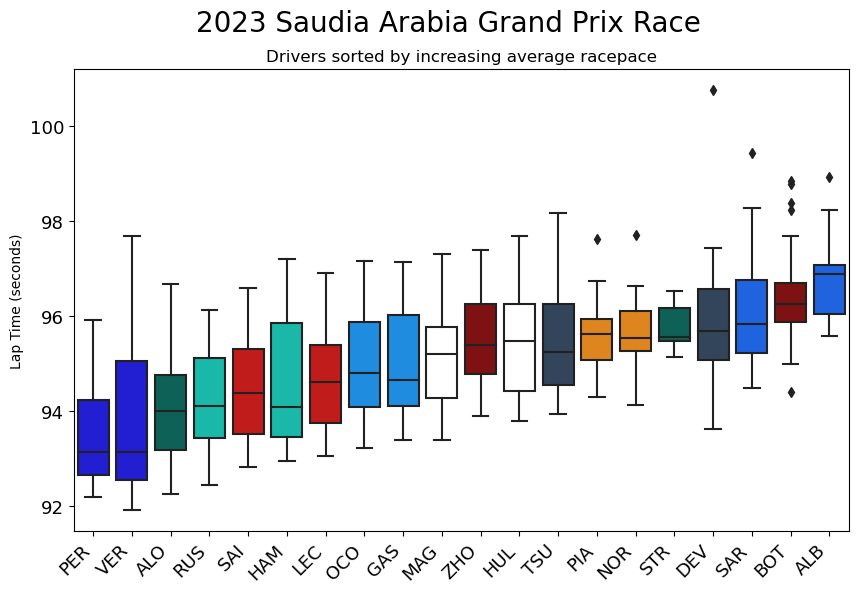

In [7]:
plt.figure(figsize=(10, 6))

p1 = sns.boxplot(
    x=driver_laptimes.Driver, 
    y=driver_laptimes.Lapseconds, 
    order=grouped.index,
    palette=driver_pal
)

# set x-axis text 
p1.set_xticklabels(
    p1.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
)
p1.tick_params(axis='both', labelsize=13)

# set axes label
plt.suptitle(f"2023 {race_name} Grand Prix Race", fontsize=20)
plt.title("Drivers sorted by increasing average racepace", fontsize=12)
p1.set(
    xlabel='', 
    ylabel='Lap Time (seconds)'
)

plt.show()

# Tyre degradation

## Autosport
https://forums.autosport.com/topic/95747-fuel-correction-formula/

I spent some time with investigations concerning the endless issue fuel corrected quali laptimes with the intention to work out a random formula for the required difference in Q3 laptimes between teammates, based on the known factor "track lenght" and the moment of the first pitstop of both drivers.


Here is the resulting formula:
0,507 x 0,035 x track length in km x first pitstop gap = required Q3 laptime difference

0,507 = kg of fuel consumption per km
based on a fuel consumption of 65 litres each 100 kms, and a specific gravity of 0,78 kgs per litre

0,035 = time gap per kg of weight difference
based on Jean Todts statement "As Flavio said, ten kilos is between three to four tenths."


An example:
According to that formula Lewis Hamilton, who was 0,15 sec faster than Fernando Alonso in Silverstone Q3, but pitted 4 laps earlier than Alonso, should have been 0,364 sec faster in Q3.

### Reddit
fuel corrected lap times: 0.03 seconds/kg/lap
https://www.reddit.com/r/F1Technical/comments/9iicw6/how_much_slower_does_a_kg_of_fuel_make_an_f1_car/

https://imgur.com/C7Ty7XH

In [8]:
total_laps = 57
# fuel_consumption_per_km = 0.507
# time_gap_per_kg = 0.03
# track_length_km = 5.412
# fuel_correction = fuel_consumption_per_km*time_gap_per_kg*track_length_km

fuel_correction = 0.05

In [9]:
tyre_deg = df_race.loc[:, ['Driver', 'Team', 'LapNumber', 'Lapseconds', 'Compound', 'TyreLife']]
tyre_deg = tyre_deg[tyre_deg['Compound'] != 'SOFT']

# subtracting the effect of the mass of the fuel left in the car
tyre_deg['FuelMassEffect'] = tyre_deg.groupby('Driver', sort=False)['LapNumber'] \
    .apply(lambda x: (total_laps-x)*fuel_correction)

# subtracting lap time by the above
tyre_deg['Lapseconds_fuelcorrected'] = tyre_deg.groupby('Driver', sort=False).apply(
        lambda x: x['Lapseconds']-x['FuelMassEffect']
    ).values

# get average lap seconds per compound per tyre life
tyres_teams = tyre_deg.loc[
    (tyre_deg['Team'] == "Mercedes") | 
    (tyre_deg['Team'] == "Aston Martin") |
    (tyre_deg['Team'] == "Ferrari") |
    (tyre_deg['Team'] == "Red Bull Racing")
]

In [10]:
# tyres_teams = tyres_teams[tyres_teams['LapNumber'] != 39]
# tyres_teams = tyres_teams[tyres_teams['LapNumber'] != 40]
# tyres_teams = tyres_teams[tyres_teams['LapNumber'] != 41]
# tyres_teams = tyres_teams[tyres_teams['LapNumber'] != 42]

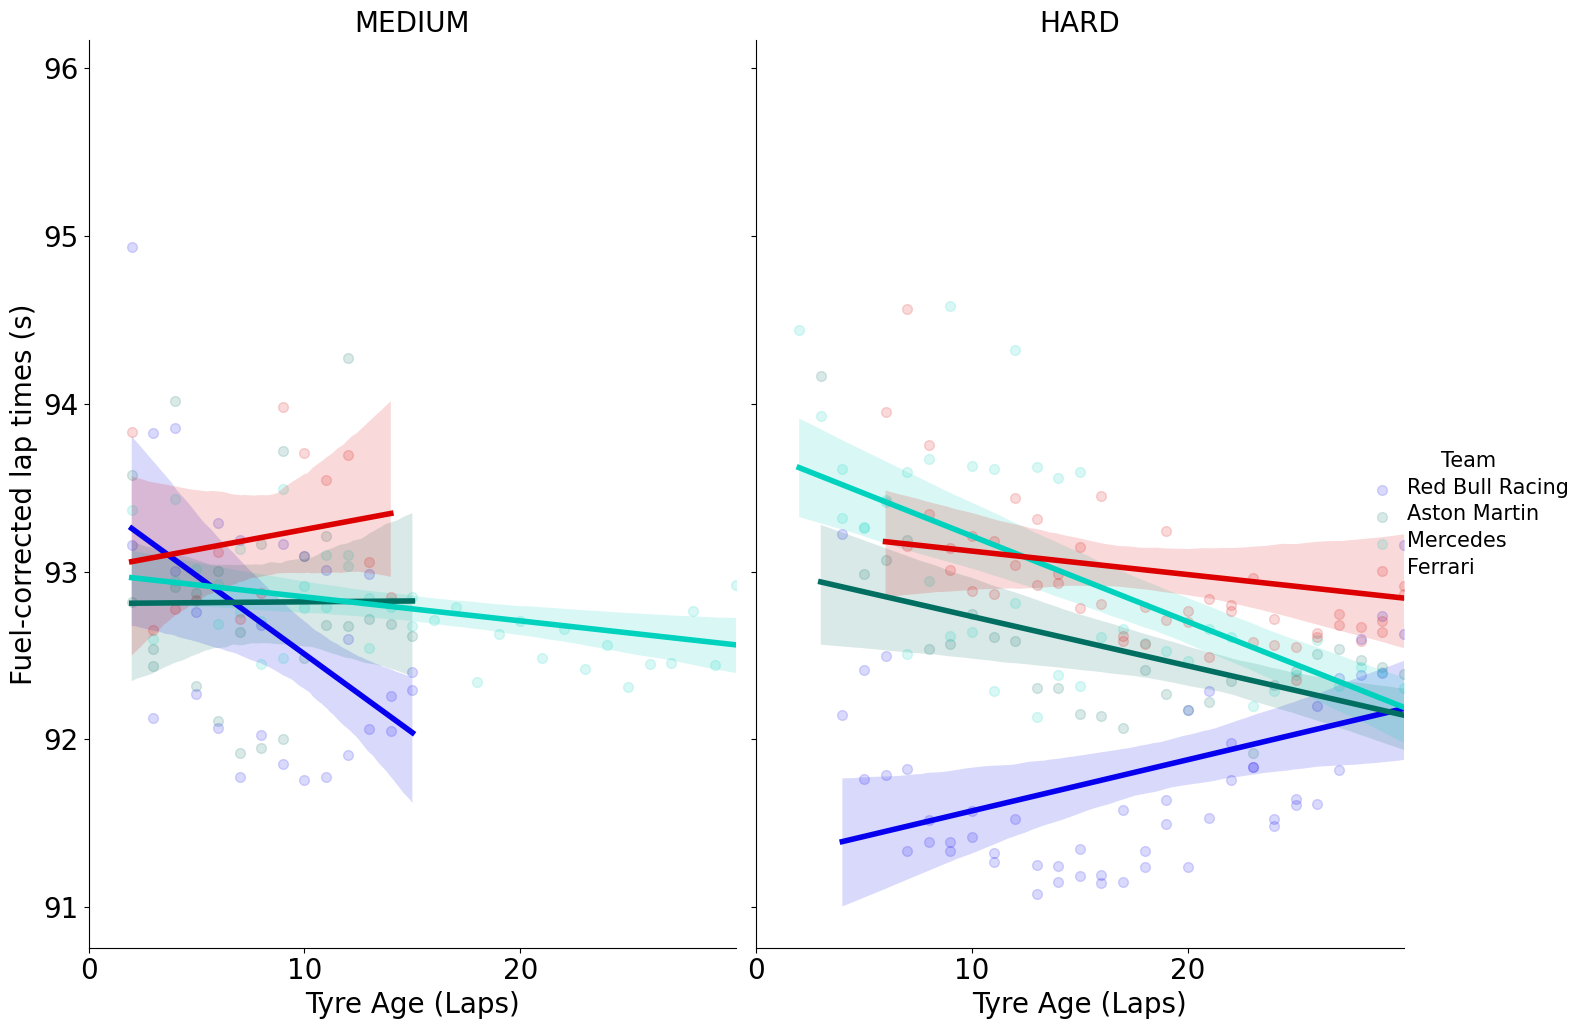

In [11]:
p1 = sns.lmplot(
    data=tyres_teams, 
    x='TyreLife', 
    y='Lapseconds_fuelcorrected', 
    hue='Team',
    col='Compound',
    palette=team_pal,
    
    scatter_kws={'alpha': 0.15, 's': 50},
    line_kws={'alpha': 1, 'lw': 4},
    height=10, aspect=0.7
)

# axis range
p1.set(
    xlim=(0,30),
    xticks=range(0,30,10)
)

# p1.set(ylim=(95,99))

# set the axis tick and labels font size for all facets
for ax in p1.axes.flat:
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlabel('Tyre Age (Laps)', fontsize=20)
    ax.set_ylabel('Fuel-corrected lap times (s)', fontsize=20)

plt.setp(p1._legend.get_title(), fontsize=15)
plt.setp(p1._legend.get_texts(), fontsize=15)
    
# set the title for each subplot
for i, title in enumerate(tyres_teams.Compound.unique()):
    p1.axes[0,i].set_title(title, fontsize=20)

plt.show()

# Race start reaction times

In [12]:
start_res = {}

for driver in df_race.Driver.unique():
    driver_telemetry = pd.DataFrame(race.laps.pick_driver(driver).telemetry)
    
    # reset index to shift it
    driver_telemetry.reset_index(inplace=True)
    
    # acceleration start time
    accel_starts = driver_telemetry.iloc[1]['Time']

    time_to_target_speed = []
    for speed in 100, 200:
        first_100kmh = driver_telemetry[driver_telemetry['Speed'] >= speed].iloc[0]['Time']
        time_to_100kmh = first_100kmh-accel_starts
        time_to_target_speed.append(time_to_100kmh.total_seconds())

    time_to_target_speed = [float('%.3g' % num) for num in time_to_target_speed]
    
    # add driver's times to dict
    start_res[driver] = time_to_target_speed

In [13]:
# Create a DataFrame using the dictionary
df_start_res = pd.DataFrame(start_res)
df_start_res = df_start_res.T

# Add column names
df_start_res.columns = ['0-100kmh', '0-200kmh']

# Add driver name as an index
df_start_res.index.name = 'Driver'

# sort by increasing 0-100kmh
df_start_res.sort_values('0-100kmh', ascending=True, inplace=True)

df_start_res.head()

,0-100kmh,0-200kmh
Driver,,
NOR,2.54,5.00
VER,2.72,5.00
RUS,2.72,5.12
SAI,2.76,5.12
LEC,2.76,5.00


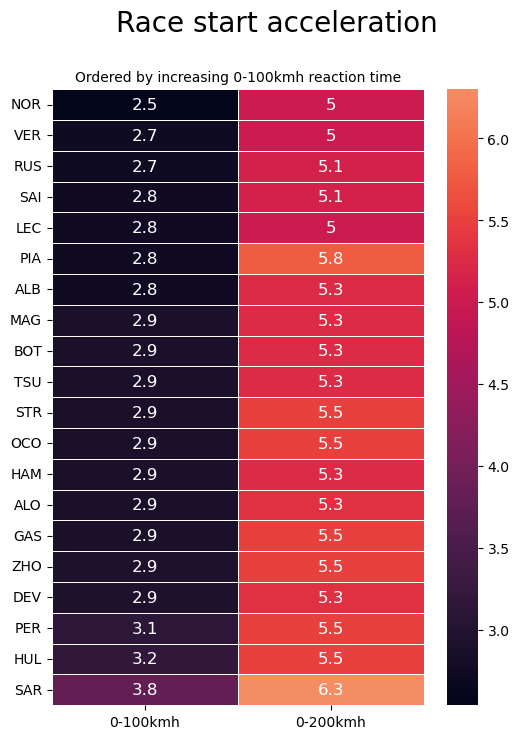

In [14]:
plt.figure(figsize=(6, 8))

p1 = sns.heatmap(
    df_start_res, 
    cmap='rocket', 
    annot=True,  
    linewidths=0.5, 
    center=5,
    annot_kws={'size': 12}
)

# set axes label
plt.suptitle("Race start acceleration", fontsize=20)
plt.title("Ordered by increasing 0-100kmh reaction time", fontsize=10)
p1.set(ylabel='')

plt.show()

# Top speed vs. mean speed

In [15]:
top_mean_speed = {}

for driver in df_race.Driver.unique():
    # get fastest lap times from driver
    driver_fl = race.laps.pick_driver(driver).pick_fastest()
    driver_fl_starttime = driver_fl.LapStartDate
    driver_fl_endtime = driver_fl_starttime+driver_fl.LapTime

    # get full lap information
    driver_telemetry = pd.DataFrame(race.laps.pick_driver(driver).telemetry)
    driver_telemetry.reset_index(inplace=True)
    driver_fl_full = driver_telemetry[driver_telemetry['Date'].between(driver_fl_starttime, driver_fl_endtime)]

    # get top speed and mean speed
    top_mean_speed[driver] = [driver_fl_full['Speed'].max(), driver_fl_full['Speed'].mean(), driver_fl.Team]

In [16]:
# Create a DataFrame using the dictionary
df_top_mean_speed = pd.DataFrame(top_mean_speed)
df_top_mean_speed = df_top_mean_speed.T

# Add column names
df_top_mean_speed.columns = ['Top_speed', 'Mean_speed', 'Team']

# Add driver name as an index
df_top_mean_speed.index.name = 'Driver'

# average per team
df_top_mean_speed = df_top_mean_speed.groupby('Team') \
    .agg(
        Top_speed_mean = pd.NamedAgg(column='Top_speed', aggfunc='mean'),
        Mean_speed_mean = pd.NamedAgg(column='Mean_speed', aggfunc='mean')) \
    .sort_values('Top_speed_mean', ascending=True)

df_top_mean_speed.head()

,Top_speed_mean,Mean_speed_mean
Team,,
Alfa Romeo,307.0,234.104890
Alpine,308.5,235.458792
AlphaTauri,311.0,234.598345
Mercedes,311.0,237.258810
Ferrari,313.5,237.027775


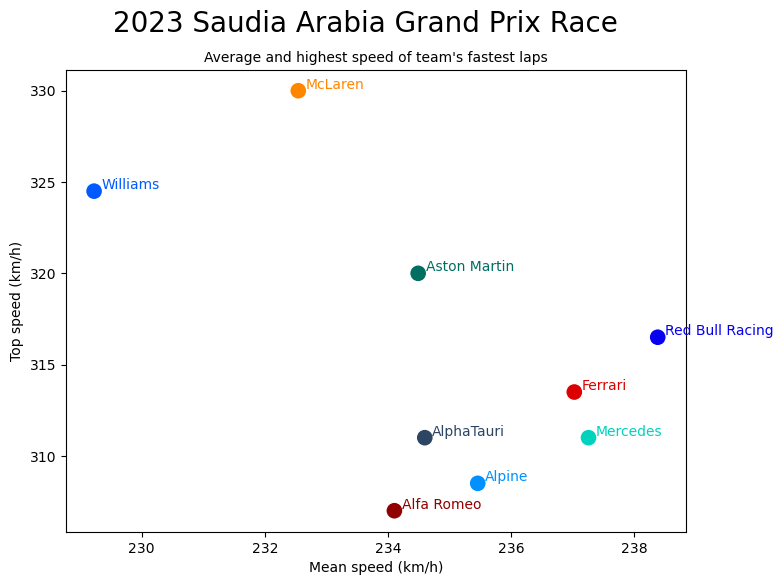

In [17]:
plt.figure(figsize=(8, 6))

p1 = sns.scatterplot(
    data=df_top_mean_speed, 
    x='Mean_speed_mean',
    y='Top_speed_mean',
    hue='Team',
    palette=team_pal,
    s=150
)

# add team label to each scatter point
for i in range(df_top_mean_speed.shape[0]):
    p1.text(
        x=df_top_mean_speed.Mean_speed_mean[i]+0.12,
        y=df_top_mean_speed.Top_speed_mean[i]+0.12,
        s=df_top_mean_speed.index[i],
        fontdict=dict(color=team_pal[df_top_mean_speed.index[i]],size=10)
    )

# # set axes label
plt.suptitle(f"2023 {race_name} Grand Prix Race", fontsize=20)
plt.title("Average and highest speed of team's fastest laps", fontsize=10)
p1.set(xlabel='Mean speed (km/h)')
p1.set(ylabel='Top speed (km/h)')
p1.get_legend().remove()

plt.show()